In [47]:
# import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn import tree, ensemble, metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px


In [2]:
# read the database
smoking_df = pd.read_csv('../data/smoking.csv')
smoking_df.head(10)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
5,5,M,30,180,75,85.0,1.2,1.2,1.0,1.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,0
6,6,M,40,160,60,85.5,1.0,1.0,1.0,1.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,1
7,7,M,45,165,90,96.0,1.2,1.0,1.0,1.0,...,15.0,1.0,1.3,38.0,71.0,111.0,Y,0,Y,0
8,9,F,50,150,60,85.0,0.7,0.8,1.0,1.0,...,13.7,1.0,0.8,31.0,31.0,14.0,Y,0,N,0
9,10,M,45,175,75,89.0,1.0,1.0,1.0,1.0,...,16.0,1.0,0.8,26.0,24.0,63.0,Y,0,N,0


In [3]:
# Dropping ID column as it is not needed
smoking_df.drop('ID',axis=1,inplace=True)

In [4]:
# Check the dataset daya types
smoking_df.dtypes

gender                  object
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                    object
dental caries            int64
tartar                  object
smoking                  int64
dtype: object

In [5]:
# describe data set
smoking_df.describe().round(2)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,...,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00
mean,44.18,164.65,65.86,82.05,1.01,1.01,1.03,1.03,121.49,76.00,...,57.29,114.96,14.62,1.09,0.89,26.18,27.04,39.95,0.21,0.37
std,12.07,9.19,12.82,9.27,0.49,0.49,0.16,0.16,13.68,9.68,...,14.74,40.93,1.56,0.40,0.22,19.36,30.95,50.29,0.41,0.48
min,20.00,130.00,30.00,51.00,0.10,0.10,1.00,1.00,71.00,40.00,...,4.00,1.00,4.90,1.00,0.10,6.00,1.00,1.00,0.00,0.00
25%,40.00,160.00,55.00,76.00,0.80,0.80,1.00,1.00,112.00,70.00,...,47.00,92.00,13.60,1.00,0.80,19.00,15.00,17.00,0.00,0.00
50%,40.00,165.00,65.00,82.00,1.00,1.00,1.00,1.00,120.00,76.00,...,55.00,113.00,14.80,1.00,0.90,23.00,21.00,25.00,0.00,0.00
75%,55.00,170.00,75.00,88.00,1.20,1.20,1.00,1.00,130.00,82.00,...,66.00,136.00,15.80,1.00,1.00,28.00,31.00,43.00,0.00,1.00
max,85.00,190.00,135.00,129.00,9.90,9.90,2.00,2.00,240.00,146.00,...,618.00,1860.00,21.10,6.00,11.60,1311.00,2914.00,999.00,1.00,1.00


In [6]:
# check unique value
smoking_df.nunique().sort_values()

oral                     1
gender                   2
dental caries            2
tartar                   2
hearing(right)           2
hearing(left)            2
smoking                  2
Urine protein            6
height(cm)              13
age                     14
eyesight(right)         17
eyesight(left)          19
weight(kg)              22
serum creatinine        38
relaxation              95
HDL                    126
systolic               130
hemoglobin             145
AST                    219
ALT                    245
fasting blood sugar    276
Cholesterol            286
LDL                    289
triglyceride           390
Gtp                    488
waist(cm)              566
dtype: int64

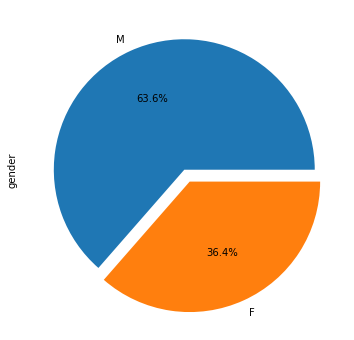

In [7]:
# visualization of gender data
smoking_df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', figsize=(6,6))


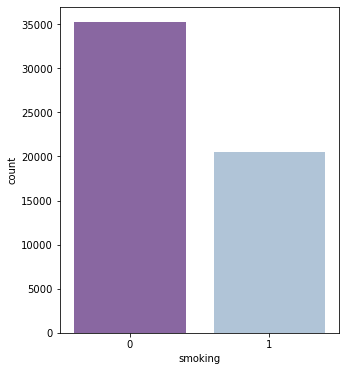

In [8]:
# visualization of gender data
# smoking_df['smoking'].value_counts().plot.bar()
plt.figure(figsize=(5,6))
plt.xlabel("smoking")
sns.countplot(data=smoking_df, x='smoking', palette='BuPu_r')
plt.show()

In [9]:
# total of non smoking and smoking
smoking_df['smoking'].value_counts()

0    35237
1    20455
Name: smoking, dtype: int64

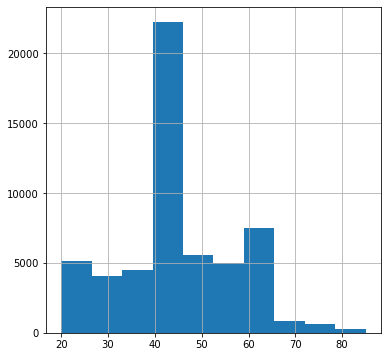

In [10]:
smoking_df['age'].hist(figsize=(6,6))

In [11]:
# check null value in data
smoking_df.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [12]:
print(smoking_df.duplicated().sum())

11140


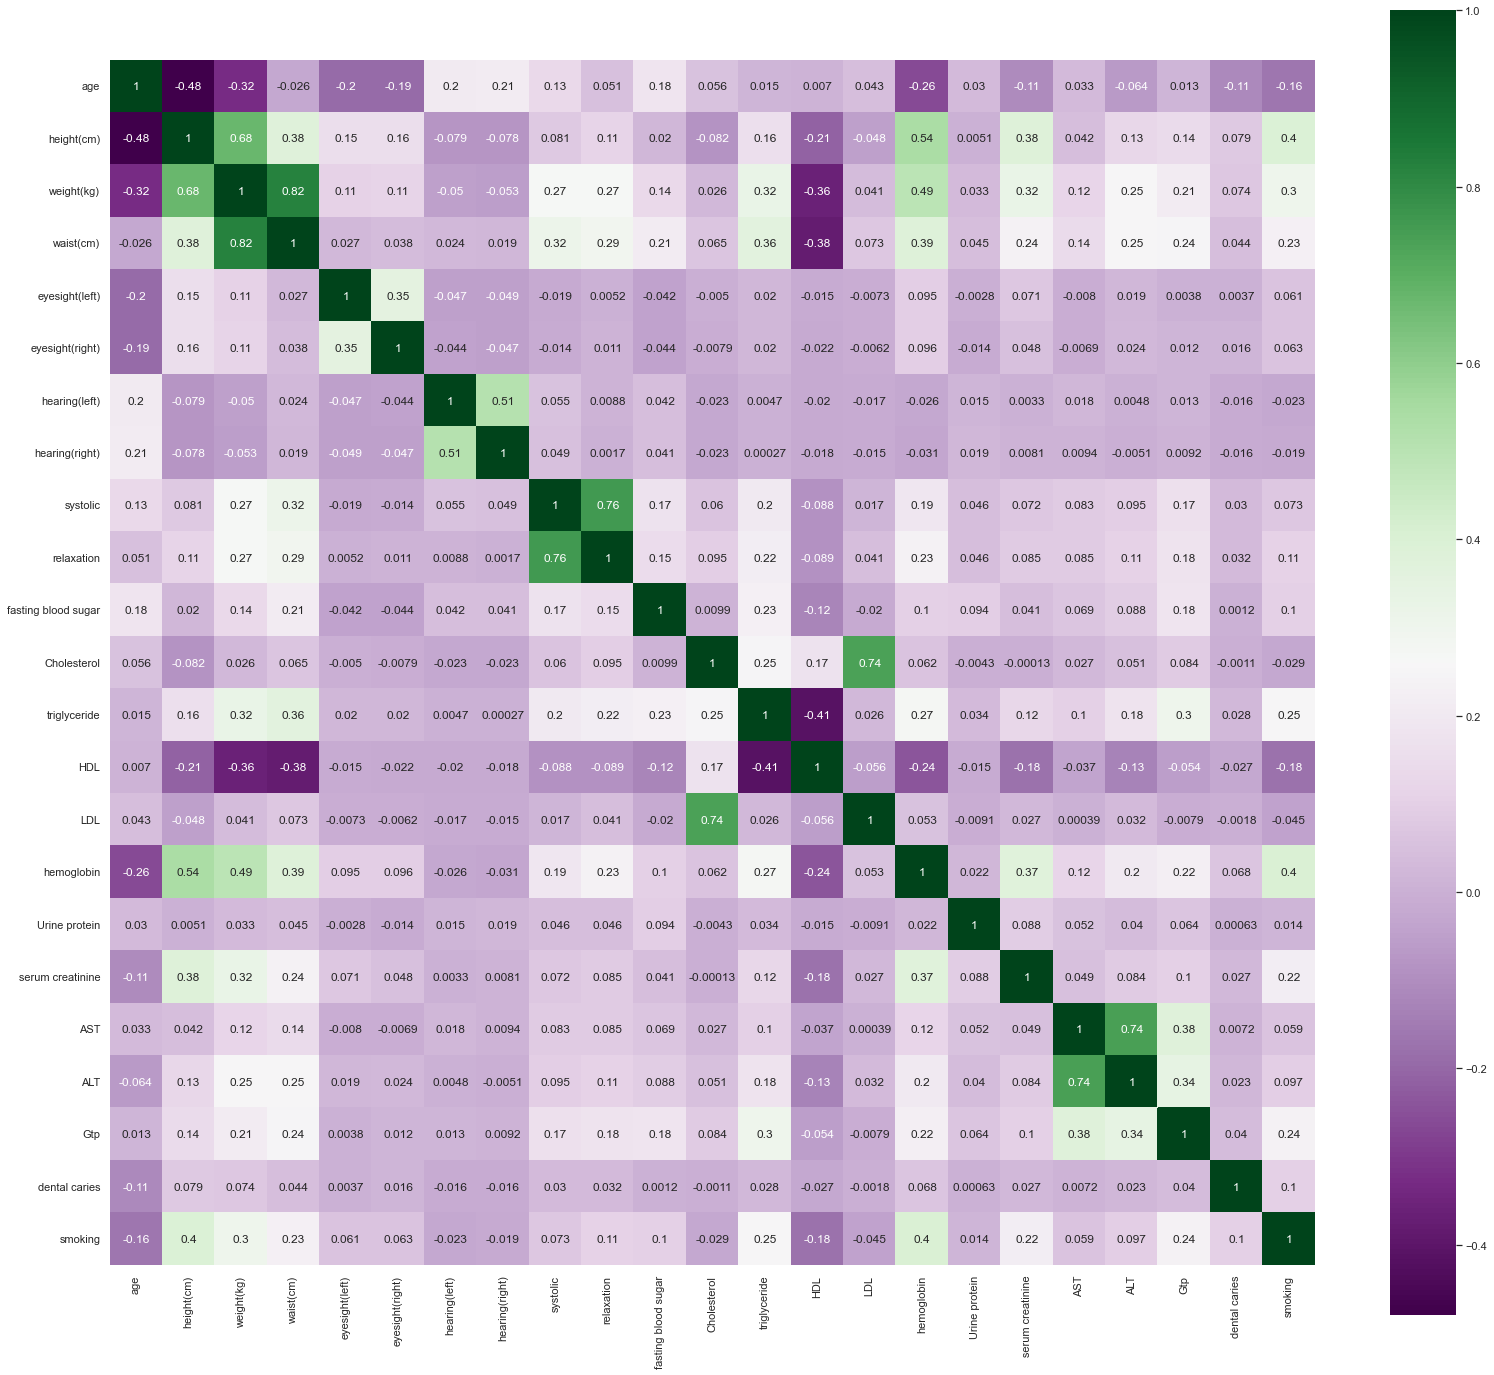

In [13]:
# heatmap of correlation
sns.set(rc={"figure.figsize":(27, 24)})
sns.heatmap(smoking_df.corr(), annot=True, square=True, cmap='PRGn')

In [14]:
smoking_df.shape

(55692, 26)

In [15]:
smoking_df.select_dtypes('object')

,gender,oral,tartar
0,F,Y,Y
1,F,Y,Y
2,M,Y,N
3,M,Y,Y
4,F,Y,N
...,...,...,...
55687,F,Y,Y
55688,F,Y,Y
55689,F,Y,N
55690,M,Y,N


In [16]:
# Dropping ID column as it is not needed
# smoking_df.drop('oral',axis=1,inplace=True)

In [17]:
# Generate our categorical variable lists
smoking_cat = smoking_df.dtypes[smoking_df.dtypes == "object"].index.tolist()

In [18]:
# Check the number of unique values in each column
smoking_df[smoking_cat].nunique()

gender    2
oral      1
tartar    2
dtype: int64

In [19]:
# Create a OneHotEncoder instance
enc = OneHotEncoder()

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(smoking_df[smoking_cat]).toarray())

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(smoking_cat)
encode_df.head()


,gender_F,gender_M,oral_Y,tartar_N,tartar_Y
0,1.0,0.0,1.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0
2,0.0,1.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0
4,1.0,0.0,1.0,1.0,0.0


In [20]:
# Merge one-hot encoded features and drop the originals
smoking_df = smoking_df.merge(encode_df,left_index=True, right_index=True)
smoking_df = smoking_df.drop(smoking_cat,1)
smoking_df.head()

C:\Users\timn\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,AST,ALT,Gtp,dental caries,smoking,gender_F,gender_M,oral_Y,tartar_N,tartar_Y
0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,...,18.0,19.0,27.0,0,0,1.0,0.0,1.0,0.0,1.0
1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,...,22.0,19.0,18.0,0,0,1.0,0.0,1.0,0.0,1.0
2,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,...,21.0,16.0,22.0,0,1,0.0,1.0,1.0,1.0,0.0
3,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,...,19.0,26.0,18.0,0,0,0.0,1.0,1.0,0.0,1.0
4,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,...,16.0,14.0,22.0,0,0,1.0,0.0,1.0,1.0,0.0


In [21]:
# smoking_df['gender'] = smoking_df['gender'].str.replace('F','0')
# smoking_df['gender'] = smoking_df['gender'].str.replace('M','1')

In [22]:
# smoking_df['gender'] = pd.to_numeric(smoking_df['gender'])

In [23]:
# smoking_df['tartar'] = smoking_df['tartar'].str.replace('N','0')
# smoking_df['tartar'] = smoking_df['tartar'].str.replace('Y','1')

In [24]:
# smoking_df['tartar'] = pd.to_numeric(smoking_df['tartar'])

In [25]:
# smoking_df['oral'] = smoking_df['oral'].str.replace('N','0')
# smoking_df['oral'] = smoking_df['oral'].str.replace('Y','1')

In [26]:
# smoking_df['oral'] = pd.to_numeric(smoking_df['oral'])

In [27]:
smoking_df.dtypes

age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
dental caries            int64
smoking                  int64
gender_F               float64
gender_M               float64
oral_Y                 float64
tartar_N               float64
tartar_Y               float64
dtype: object

In [28]:
# Split our preprocessed data into our features and target arrays
# features = ['gender','age','height(cm)','weight(kg)','waist(cm)','eyesight(left)','eyesight(right)','hearing(left)','hearing(right)','systolic','relaxation','fasting blood sugar','Cholesterol','triglyceride','HDL','LDL','hemoglobin','Urine protein','serum creatinine','AST','ALT','Gtp','oral','dental caries','tartar']
# X = smoking_df[features]
# y = smoking_df['smoking']
# x.shape, y.shape

In [29]:
# Split our preprocessed data into our features and target arrays
y = smoking_df["smoking"].values
X = smoking_df.drop(["smoking"],axis = 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(41769, 27)
(13923, 27)
(41769,)
(13923,)


In [31]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# x_test_scaled = scaler.transform(X_test)

In [32]:
# create function for predictions
def plot_predictions(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
    plt.figure(figsize=(15,8))
    plt.plot(df[:20])
    plt.legend(['Actual' , 'Predicted'])

In [33]:
# linear regression test
reg = linear_model.LinearRegression()
reg.fit(X_train_scaled,y_train)
regv =reg.score(X_train_scaled,y_train)
regv

0.30610934279063107

In [34]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

# Fit the model using training data
# YOUR CODE HERE!
classifier.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [35]:
# Make a prediction using the testing data
# YOUR CODE HERE!
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,0,1
2,1,0
3,1,0
4,0,0
5,0,0
6,1,1
7,0,0
8,1,0
9,0,0


In [36]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.742296918767507

In [37]:
confusion_matrix = confusion_matrix(y_test, predictions)

# Print the confusion matrix for the training data
print(confusion_matrix)

[[6796 1976]
 [1612 3539]]


In [38]:
classification_report = classification_report(y_test, predictions)

# Print the training classification report
print(classification_report)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      8772
           1       0.64      0.69      0.66      5151

    accuracy                           0.74     13923
   macro avg       0.72      0.73      0.73     13923
weighted avg       0.75      0.74      0.74     13923



In [39]:
# decision tree regressor test
tdt = DecisionTreeRegressor().fit(X_train_scaled, y_train)
tdtv = tdt.score(X_train_scaled,y_train)
tdtv 

1.0

In [41]:
y_pred = tdt.predict(X_test_scaled)

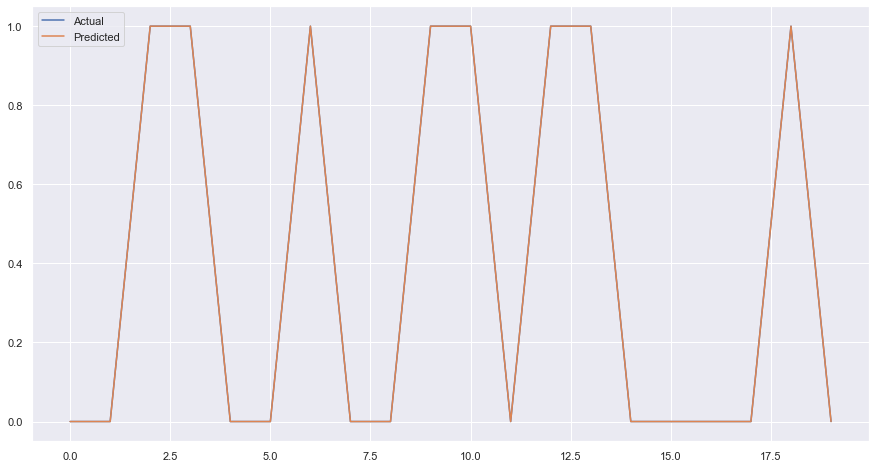

In [42]:
plot_predictions(tdt, X_test_scaled, y_pred)

In [43]:
# decision tree classifier test
tree_classifier = tree.DecisionTreeClassifier(max_depth=15, min_samples_split=50, min_samples_leaf=10).fit(X_train_scaled, y_train)
print(f"Accuracy for selected tree model: {metrics.accuracy_score(y_train, tree_classifier.predict(X_train_scaled))}")

Accuracy for selected tree model: 0.8220211161387632


In [44]:
DTC = tree.DecisionTreeClassifier(max_depth=15, min_samples_split=50, min_samples_leaf=10)
DTC.fit(X_train_scaled, y_train)

dtc_y_pred = DTC.predict(X_test_scaled)

print("Score the X-train with y-train is : ", DTC.score(X_train_scaled,y_train))
print("Score the X-test  with y-test  is : ", DTC.score(X_test_scaled,y_test))
print("Accuracy Score :",accuracy_score(y_test,dtc_y_pred)*100)

Score the X-train with y-train is :  0.8220211161387632
Score the X-test  with y-test  is :  0.7427278603749192
Accuracy Score : 74.27278603749193


In [45]:
DTC.score(X_test_scaled,y_test)

0.7427278603749192

In [48]:
dtcclassification_report = classification_report(y_test, dtc_y_pred)

# Print the training classification report
print(dtcclassification_report)

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      8772
           1       0.65      0.66      0.65      5151

    accuracy                           0.74     13923
   macro avg       0.72      0.73      0.72     13923
weighted avg       0.74      0.74      0.74     13923



In [107]:
# y_pred = DTC.predict(X_test_scaled)

In [49]:
dtcv = DTC.score(X_train_scaled,y_train)
dtcv

0.8220211161387632

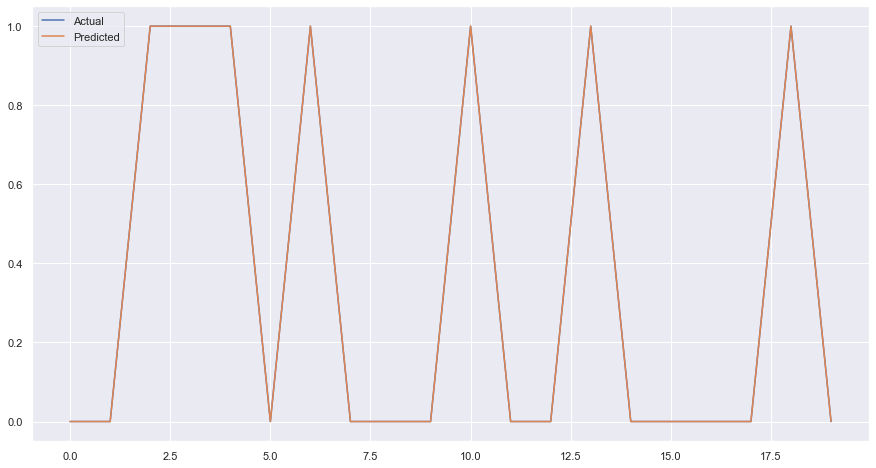

In [51]:
plot_predictions(DTC, X_test_scaled, dtc_y_pred)

In [52]:
# random forest regressor test
rf = RandomForestRegressor().fit(X_train_scaled, y_train)
rfv = rf.score(X_train_scaled,y_train)
rfv

0.9283972599313279

In [53]:
rf_y_pred = rf.predict(X_test_scaled)

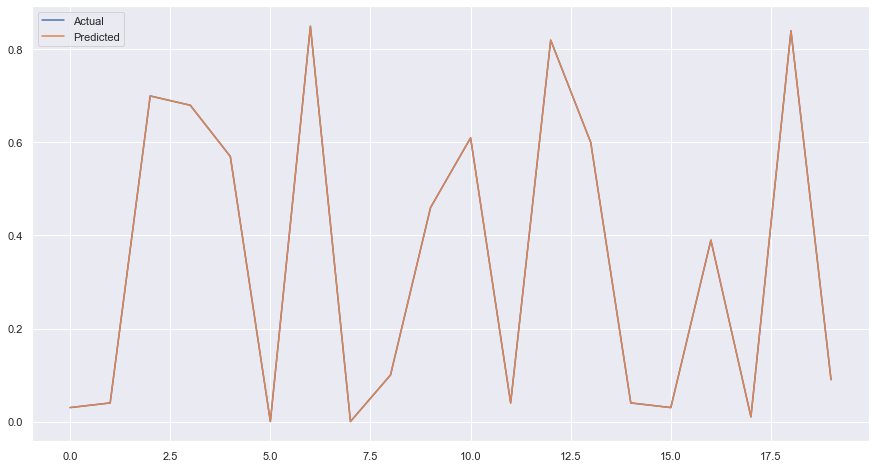

In [54]:
plot_predictions(rf, X_test_scaled, rf_y_pred)

In [55]:
# Random Forest test
random_forest_classifier = ensemble.RandomForestClassifier(n_estimators=50, max_depth=15, min_samples_split=5, min_samples_leaf=45).fit(X_train_scaled, y_train)
print(f"Accuracy for selected random forest model: {metrics.accuracy_score(y_train, random_forest_classifier.predict(X_train_scaled))}")

Accuracy for selected random forest model: 0.8009049773755657


In [56]:
rfc = random_forest_classifier.score(X_train_scaled,y_train)
rfc

0.8009049773755657

In [57]:
rfc_y_pred = random_forest_classifier.predict(X_test_scaled)

In [58]:
rfcclassification_report = classification_report(y_test, rfc_y_pred)

# Print the training classification report
print(rfcclassification_report)

              precision    recall  f1-score   support

           0       0.83      0.78      0.81      8772
           1       0.66      0.73      0.70      5151

    accuracy                           0.76     13923
   macro avg       0.75      0.76      0.75     13923
weighted avg       0.77      0.76      0.77     13923



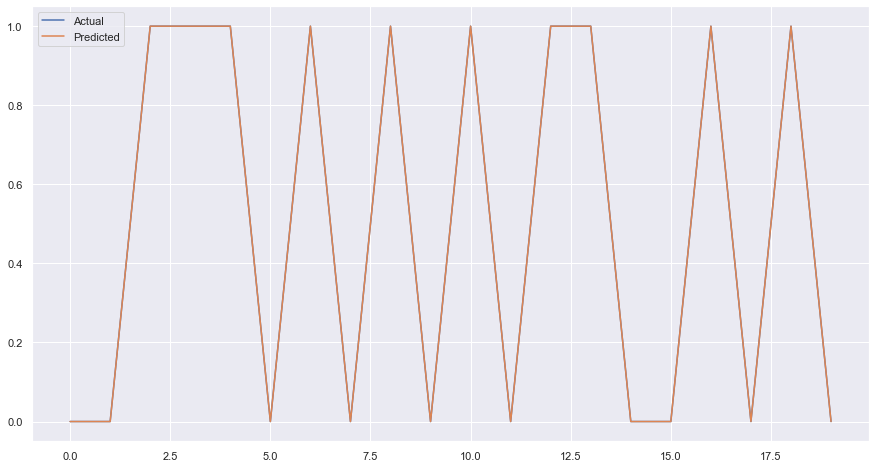

In [59]:
plot_predictions(random_forest_classifier, X_test_scaled, rfc_y_pred)

In [60]:
dic = {'linear Regression':regv,'Decision Tree Regressor':tdtv,'RandomForest Regressor':rfv, 'Random Forest Classifier':rfc, 'Decesion Tree Classifier':dtcv }

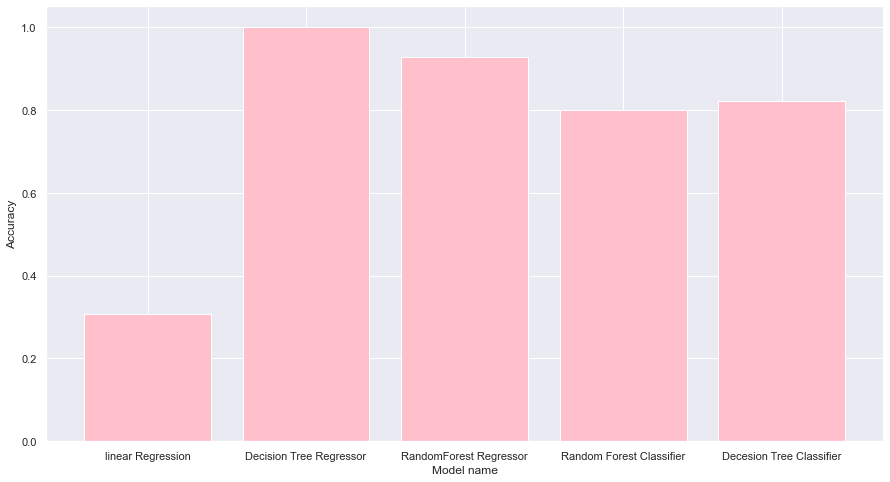

In [61]:
names = list(dic.keys())
values = list(dic.values())
plt.rc('font', size=20)

plt.figure(figsize=(15,8))
plt.xlabel('Model name')
plt.ylabel('Accuracy')

plt.bar(range(len(dic)), values, tick_label=names,color='pink')
plt.show()

In [62]:
from joblib import dump
# https://scikit-learn.org/stable/model_persistence.html
dump(rf, 'model.joblib')

['model.joblib']